In [1]:
import pandas as pd

# Original dataset visualization

## Parameters

In [2]:
original_dataset_path = '/work/com-304/SAGA/cache/vggsound_valid.csv'

## Statistics

In [3]:
original_dataset = pd.read_csv(original_dataset_path)
original_dataset.head()

,video_clip_name,timestamp,class,group_name
0,xEqmJZ-ET9k,520,"child speech, kid speaking",train
1,qx1Ld5-3Nv8,61,fox barking,train
2,SBlN_GSNLQk,15,car engine knocking,train
3,Al186fgrAzc,8,fireworks banging,train
4,H1_5M9mQ79w,80,playing harmonica,train


In [4]:
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168158 entries, 0 to 168157
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   video_clip_name  168158 non-null  object
 1   timestamp        168158 non-null  int64 
 2   class            168158 non-null  object
 3   group_name       168158 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.1+ MB


In [5]:
print("Classes distribution")
original_dataset['class'].value_counts().reset_index()

Classes distribution


,class,count
0,"railroad car, train wagon",982
1,"motorboat, speedboat acceleration",975
2,"race car, auto racing",974
3,"rowboat, canoe, kayak rowing",971
4,"playing marimba, xylophone",968
...,...,...
305,cell phone buzzing,152
306,air horn,151
307,people finger snapping,149
308,people slapping,147


In [6]:
print("Group distribution:")
stat = original_dataset['group_name'].value_counts().reset_index()
stat['percentage'] = (stat['count'] / len(original_dataset) * 100).round(2)
stat

Group distribution:


,group_name,count,percentage
0,train,117710,70.0
1,test,33632,20.0
2,eval,16816,10.0


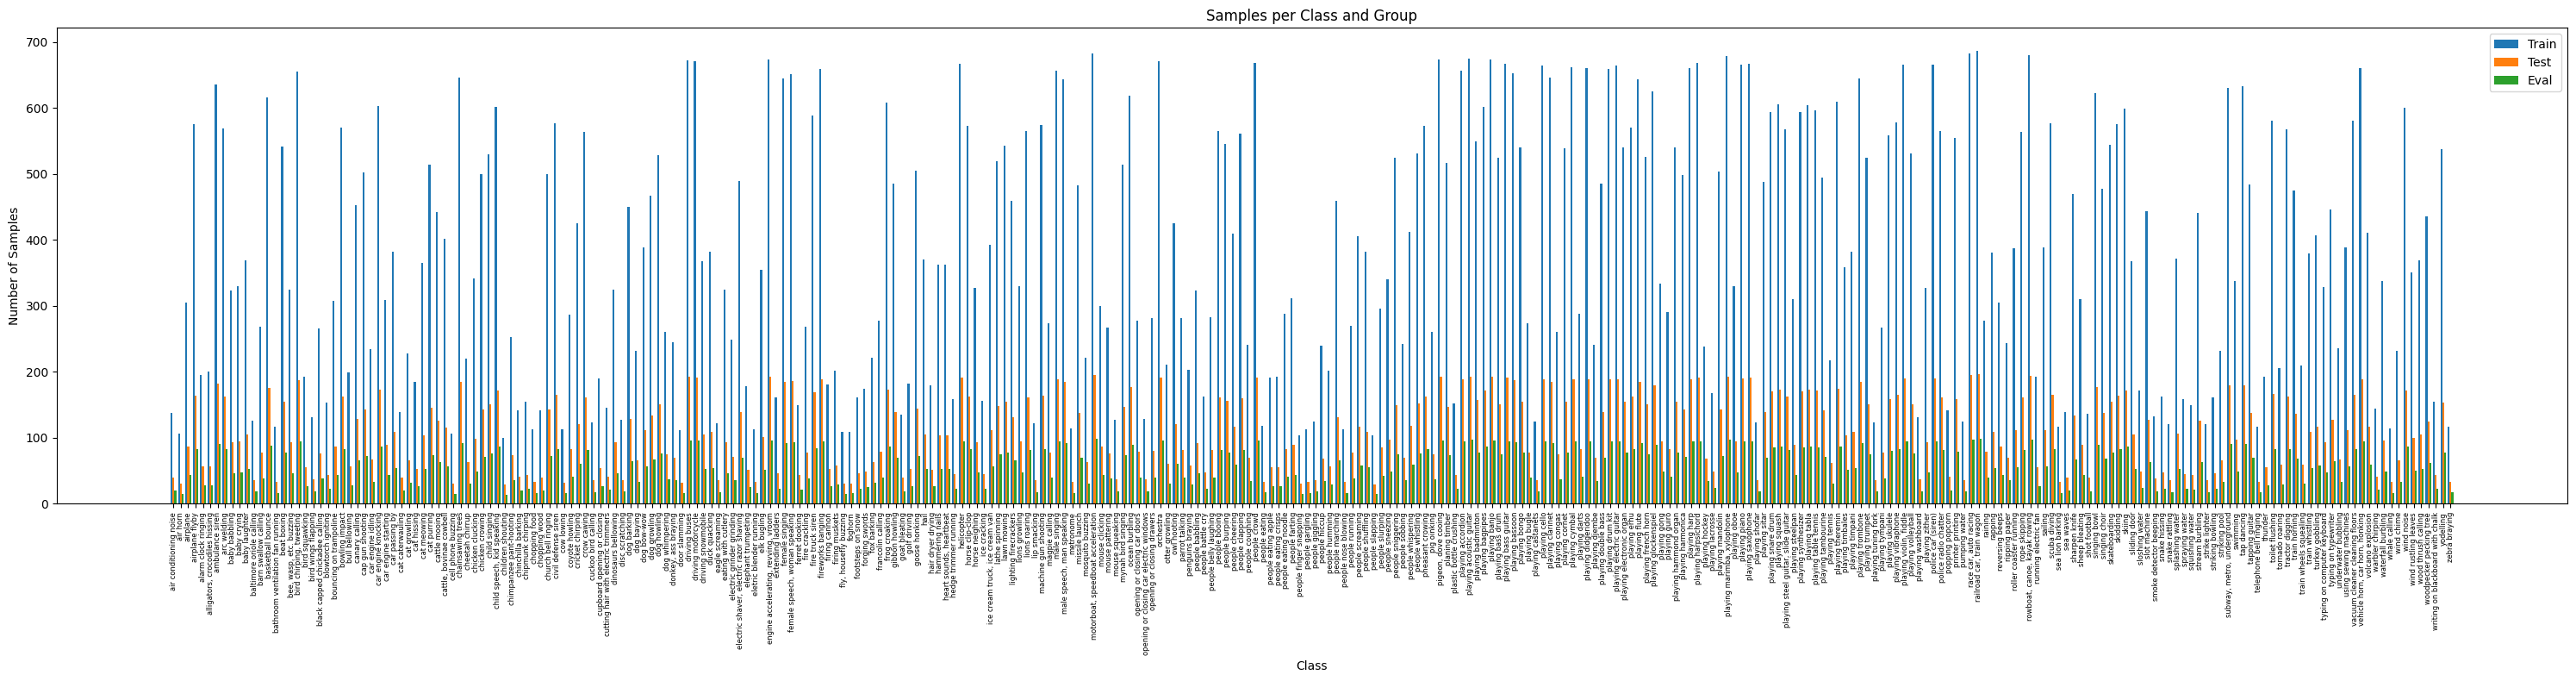

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data: count samples for each (class, group_name) pair
pivot = original_dataset.pivot_table(index='class', columns='group_name', aggfunc='size', fill_value=0)

# Ensure all group columns are present
for group in ['train', 'test', 'eval']:
    if group not in pivot.columns:
        pivot[group] = 0

pivot = pivot[['train', 'test', 'eval']]  # Ensure order

# Plotting
fig, ax = plt.subplots(figsize=(30, 8))  # Adjust width as needed for readability

x = np.arange(len(pivot.index))  # the label locations
width = 0.25  # the width of the bars

rects1 = ax.bar(x - width, pivot['train'], width, label='Train')
rects2 = ax.bar(x,        pivot['test'],  width, label='Test')
rects3 = ax.bar(x + width, pivot['eval'], width, label='Eval')

# Add labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Samples')
ax.set_title('Samples per Class and Group')
ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=90, fontsize=6)  # Smaller font for many classes
ax.legend()

plt.tight_layout()
plt.show()

# Creation of personalized dataset

## Parameters definition

In [8]:
original_dataset_path = '/work/com-304/SAGA/cache/vggsound_valid.csv'
new_dataset_name = 'label2audio'
tokens_root = '/work/com-304/SAGA/tokens_16_05'

In [9]:
new_dataset = pd.read_csv(original_dataset_path)
new_dataset.head()

,video_clip_name,timestamp,class,group_name
0,xEqmJZ-ET9k,520,"child speech, kid speaking",train
1,qx1Ld5-3Nv8,61,fox barking,train
2,SBlN_GSNLQk,15,car engine knocking,train
3,Al186fgrAzc,8,fireworks banging,train
4,H1_5M9mQ79w,80,playing harmonica,train


## Data processing

Filter the csv so there is only the tokenized entries

In [10]:
import os
import pandas as pd

# Parameters
modality = 'tok_audio@24_000'  # Change to any modality you want to check

# Gather all available tokenized files for each group
available_files = set()
for group in ['train', 'test', 'eval']:
    modality_dir = os.path.join(tokens_root, group, modality)
    if not os.path.isdir(modality_dir):
        continue
    files = [f for f in os.listdir(modality_dir) if f.endswith('.npy')]
    stems = [os.path.splitext(f)[0] for f in files]
    available_files.update(stems)

# Filter DataFrame to only keep rows where video_clip_name is in available_files
new_dataset = new_dataset[new_dataset['video_clip_name'].isin(available_files)].reset_index(drop=True)

print(f"Original CSV rows: {len(original_dataset)}")
print(f"Filtered CSV rows: {len(new_dataset)}")
new_dataset.head()

Original CSV rows: 168158
Filtered CSV rows: 168139


,video_clip_name,timestamp,class,group_name
0,xEqmJZ-ET9k,520,"child speech, kid speaking",train
1,qx1Ld5-3Nv8,61,fox barking,train
2,SBlN_GSNLQk,15,car engine knocking,train
3,Al186fgrAzc,8,fireworks banging,train
4,H1_5M9mQ79w,80,playing harmonica,train


Take only the 10 most present classes

In [11]:
# Number of top classes to keep
top_k = 50

# Find the top_k most present classes
top_classes = new_dataset['class'].value_counts().nlargest(top_k).index.tolist()

# Filter the dataset to only keep samples in those classes
new_dataset = new_dataset[new_dataset['class'].isin(top_classes)].reset_index(drop=True)

print(f"Kept {len(new_dataset)} samples from the {top_k} most present classes:")
print(new_dataset['class'].value_counts())

# Optionally, display the first few rows
new_dataset.head()

Kept 46696 samples from the 50 most present classes:
class
railroad car, train wagon              981
motorboat, speedboat acceleration      975
race car, auto racing                  974
rowboat, canoe, kayak rowing           971
playing marimba, xylophone             968
playing acoustic guitar                964
pigeon, dove cooing                    962
playing banjo                          962
engine accelerating, revving, vroom    961
driving buses                          960
orchestra                              958
driving motorcycle                     958
people crowd                           955
playing harpsichord                    954
helicopter                             953
playing bass guitar                    953
playing saxophone                      953
playing piano                          951
playing violin, fiddle                 950
police car (siren)                     950
playing electric guitar                948
playing cello                         

,video_clip_name,timestamp,class,group_name
0,Al186fgrAzc,8,fireworks banging,train
1,VlK33HIImGs,160,orchestra,train
2,qyHpYRNhSZM,0,"rowboat, canoe, kayak rowing",train
3,wDcPHVMHWDo,110,playing accordion,train
4,CARHWCRihbc,130,playing bass guitar,train


## Dataset statistics

In [12]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46696 entries, 0 to 46695
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   video_clip_name  46696 non-null  object
 1   timestamp        46696 non-null  int64 
 2   class            46696 non-null  object
 3   group_name       46696 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [13]:
print("Classes distribution")
new_dataset['class'].value_counts().reset_index()

Classes distribution


,class,count
0,"railroad car, train wagon",981
1,"motorboat, speedboat acceleration",975
2,"race car, auto racing",974
3,"rowboat, canoe, kayak rowing",971
4,"playing marimba, xylophone",968
5,playing acoustic guitar,964
6,"pigeon, dove cooing",962
7,playing banjo,962
8,"engine accelerating, revving, vroom",961
9,driving buses,960


In [14]:
print("Group distribution:")
stat = new_dataset['group_name'].value_counts().reset_index()
stat['percentage'] = (stat['count'] / len(new_dataset) * 100).round(2)
stat

Group distribution:


,group_name,count,percentage
0,train,32683,69.99
1,test,9343,20.01
2,eval,4670,10.00


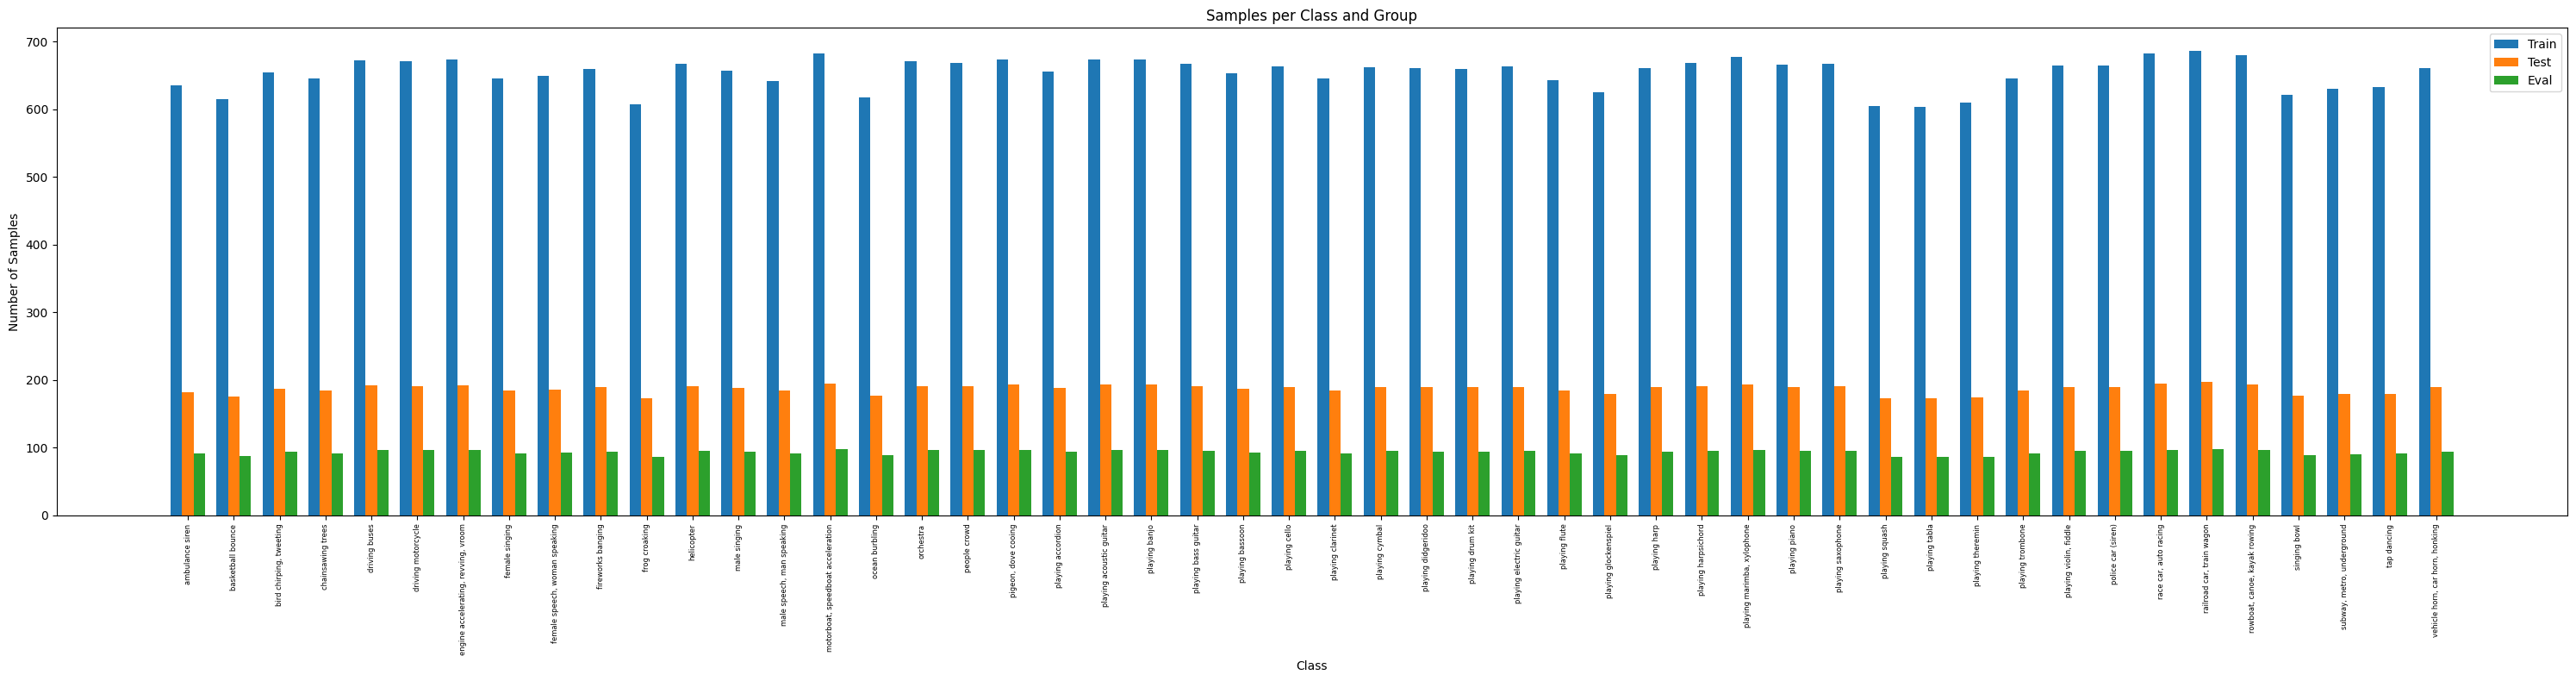

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data: count samples for each (class, group_name) pair
pivot = new_dataset.pivot_table(index='class', columns='group_name', aggfunc='size', fill_value=0)

# Ensure all group columns are present
for group in ['train', 'test', 'eval']:
    if group not in pivot.columns:
        pivot[group] = 0

pivot = pivot[['train', 'test', 'eval']]  # Ensure order

# Plotting
fig, ax = plt.subplots(figsize=(30, 8))  # Adjust width as needed for readability

x = np.arange(len(pivot.index))  # the label locations
width = 0.25  # the width of the bars

rects1 = ax.bar(x - width, pivot['train'], width, label='Train')
rects2 = ax.bar(x,        pivot['test'],  width, label='Test')
rects3 = ax.bar(x + width, pivot['eval'], width, label='Eval')

# Add labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Number of Samples')
ax.set_title('Samples per Class and Group')
ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=90, fontsize=6)  # Smaller font for many classes
ax.legend()

plt.tight_layout()
plt.show()

## Save dataset

### Save CSV

In [16]:
from datetime import datetime
filename = f"{new_dataset_name}_{datetime.now().strftime('%Y-%m-%d_%H-%M')}.csv"
new_dataset.to_csv(filename, index=False)

### Save tokens

In [ ]:
from select_tokens import organize_files

csv_path = filename
source_dir = "/work/com-304/SAGA/tokens_16_05"  # Adjust this to your source directory
dest_dir = f"/work/com-304/SAGA/tokens_{datetime.now().strftime('%Y-%m-%d_%H-%M')}"  # Adjust this to your desired destination

# Execute organization]
print("Run the following command to organize files:")
print(f"python select_tokens.py {csv_path} {source_dir} {dest_dir}")

Run the following command to organize files:
python select_tokens.py label2audio_2025-05-25_17-57.csv /work/com-304/SAGA/tokens_16_05 /work/com-304/SAGA/tokens_2025-05-25_17-57
